In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.2
asyncer                       0.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpor

In [10]:
!pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 455.9/455.9 MB 451.8 kB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.0
    Uninstalling tensorboard-2.11.0:
      Successfully uninstalled tensorboard-2.1

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'C:\\Users\\Dell\\AppData\\Roaming\\Python\\Python39\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Check the permissions.



In [3]:
import tensorflow as tf
import os

In [18]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [30]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [20]:
data_dir = 'data'

In [21]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [35]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data\happy\1rOrTgNQABn0P7dy3IrNDjg.jpeg
Image not in ext list data\happy\21411256-young-happy-people-group-portrait.jpg
Image not in ext list data\happy\2560px-Happy_People.jpg
Image not in ext list data\happy\56f455011e0000b300705475.jpeg
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\Happy20People.jpg
Image not in ext list data\happy\portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not in ext list data\happy\portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in ext list data\happy\sjnv_cnh7ugnaddm7so6sq.jpg
Image not in ext list data\sad\1DvV_sCibWNUf9lvcOMR4bw.jpeg
Image not in ext list data\sad\39843138-sad-man.jpg
Image not in ext list data\sad\50740738-sad-people-s-portraits.jpg
Image not in ext list data\sad\african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list data\sad\crying-sad.gif
Image not in ext list data\sad\depositphotos_25235121-sto

In [36]:
tf.data.Dataset??

In [37]:
import numpy as np

In [74]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 165 files belonging to 2 classes.


In [41]:
data_iterator = data.as_numpy_iterator()

In [51]:
batch = data_iterator.next()

In [52]:
batch[0].shape

(32, 256, 256, 3)

In [53]:
batch[1]

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

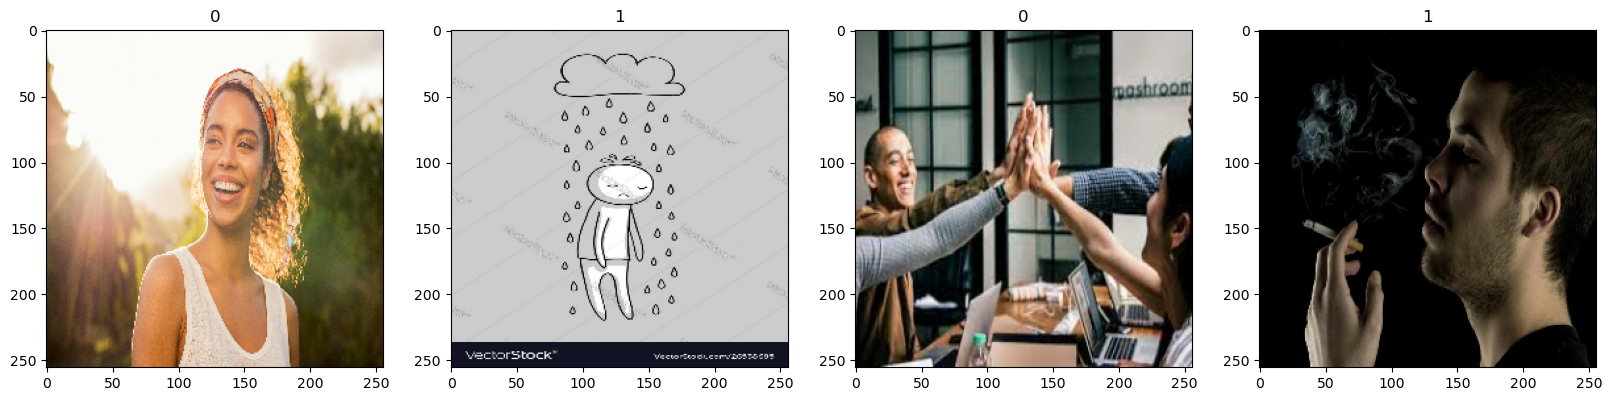

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [61]:
scaled = batch[0] / 255

In [62]:
scaled.min()

0.0

In [75]:
data = data.map(lambda x, y: (x / 255, y))

In [76]:
scaled_iterator = data.as_numpy_iterator()

In [77]:
batch = scaled_iterator.next()

In [80]:
batch[0].min()

0.0

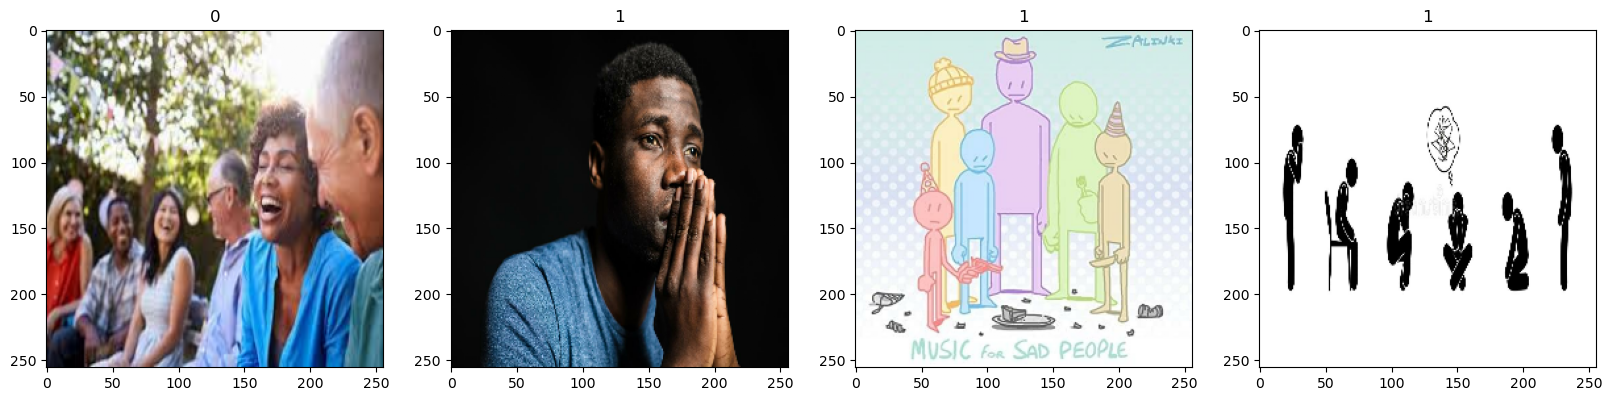

In [81]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 2.2 Split Data

In [82]:
len(data)

6

In [92]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [93]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [94]:
len(train)

4

# 3. Deep Learning

### 3.1 Build Deep Learning Model

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [96]:
model = Sequential()

In [97]:
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [98]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### 3.2 Train

In [100]:
logdir = 'logs'

In [102]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [103]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - ETA: 0s - loss: 1.4161 - accuracy: 0.4141WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000112981D1550> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set th

In [104]:
hist

### 3.3 Plot Performance

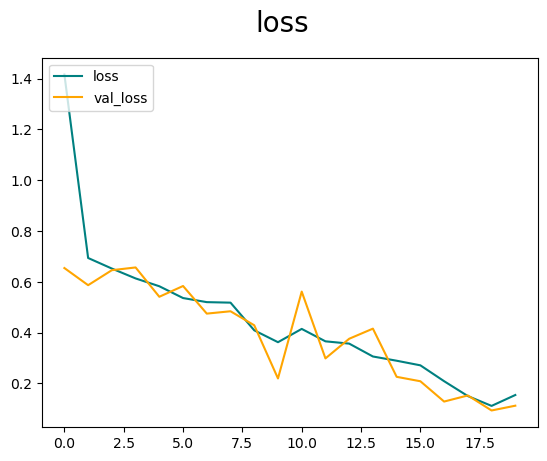

In [107]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

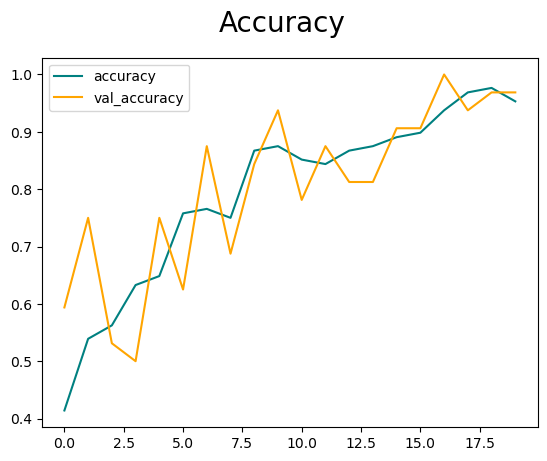

In [108]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

### 4.1 Evaluate

In [109]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [110]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [111]:
len(test)

1

In [112]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 2s 2s/step


In [114]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy: 1.0


### 4.2 Test

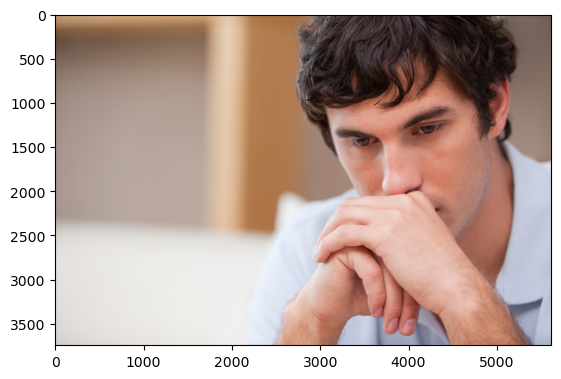

In [130]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

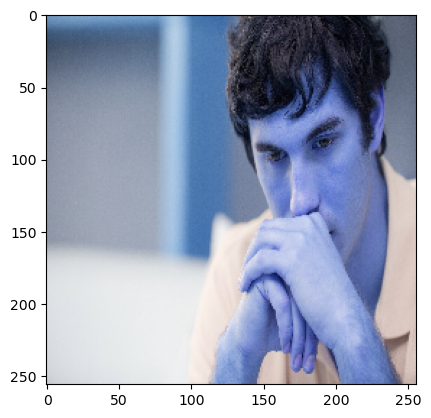

In [131]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [132]:
resize.shape

TensorShape([256, 256, 3])

In [133]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [134]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 48ms/step


In [135]:
yhat

array([[0.86768156]], dtype=float32)

In [136]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy


# 5. Save the Model

### 5.1 Save the Model

In [137]:
from tensorflow.keras.models import load_model

In [138]:
model.save(os.path.join('models', 'happysadmodel.h5'))